# ETL Pipeline for AI Job Listings
## ABB #3 - Session 2

Code authored by: Shaw Talebi

### imports

In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt

### Extract

*Note: This step is done by **example_0-extract_job_data.py**, so here we just load the data from file.*

In [2]:
# load .csv as dataframe
df = pd.read_csv("data/job_data.csv")
df.shape

(1179, 5)

In [3]:
df.head()

,company_name,job_title,job_description,job_url,search_query
0,Chewy,Staff Data Scientist,<p><strong>Our Opportunity:</strong></p> <p>Do...,https://www.themuse.com/jobs/chewy/staff-data-...,Data Scientist
1,Chewy,Staff Data Scientist,<p><strong>Our Opportunity:</strong></p> <p>Do...,https://www.themuse.com/jobs/chewy/staff-data-...,Data Scientist
2,Capital One,Senior Data Scientist,"<p>Locations: VA - McLean, United States of Am...",https://www.themuse.com/jobs/capitalone/senior...,Data Scientist
3,Capital One,Senior Data Scientist,"<p>Locations: VA - McLean, United States of Am...",https://www.themuse.com/jobs/capitalone/senior...,Data Scientist
4,Deloitte,Sr. Data Scientist,<p><b>Position Summary</b><br><br>Do you want ...,https://www.themuse.com/jobs/deloitte/sr-data-...,Data Scientist


### Transform

#### drop duplicates

In [4]:
# drop duplicate JDs
print("Original shape:", df.shape)
df = df.drop_duplicates(subset="job_description")
print("Duplicates dropped:", df.shape)

Original shape: (1179, 5)
Duplicates dropped: (834, 5)


#### add features counting key distingushing skills for DS and MLE roles

In [5]:
# Preprocess job descriptions by converting to lowercase and removing HTML tags
df['cleaned_description'] = df['job_description'].apply(lambda x: re.sub(r'<[^>]+>', '', str(x).lower()))

In [6]:
# Define keywords for data scientists and MLEs (initial broad list)
ds_keywords = [
    "statistics", "data visualization", "sql", "pandas", "numpy",
    "scikit-learn", "hypothesis testing", "eda", "a/b testing", "tableau"
]
mle_keywords = [
    "deployment", "docker", "kubernetes", "api", "tensorflow",
    "pytorch", "ci/cd", "aws", "gcp", "distributed computing"
]

In [7]:
# Create separate columns for each Data Scientist skill
for skill in ds_keywords:
    df[f'{skill}_count'] = df['cleaned_description'].apply(lambda desc: desc.count(skill))

# Create separate columns for each Machine Learning Engineer skill
for skill in mle_keywords:
    df[f'{skill}_count'] = df['cleaned_description'].apply(lambda desc: desc.count(skill))

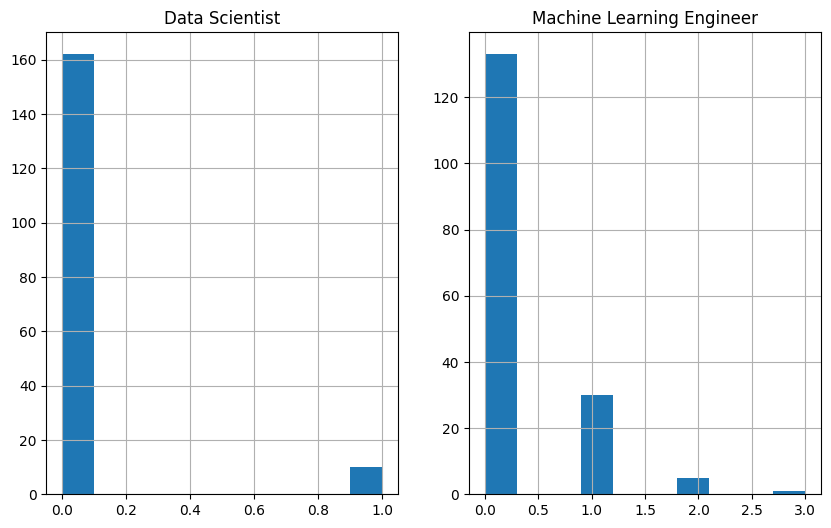

In [8]:
# # side-by-side comparison of individual skill count distributions
# skill = "kubernetes"
# j = df.columns.get_loc(f"{skill}_count")

# plt.figure(figsize=(10, 6))

# plt.subplot(1,2,1)
# plt.title("Data Scientist")
# df[df["search_query"]=="Data Scientist"].iloc[:,j].hist()

# plt.subplot(1,2,2)
# plt.title("Machine Learning Engineer")
# df[df["search_query"]=="Machine Learning Engineer"].iloc[:,j].hist()

# plt.show()

#### create target label

In [9]:
df_transformed = df[df["search_query"].isin(["Data Scientist", "Machine Learning Engineer"])].copy()
df_transformed['is_data_scientist'] = df["search_query"]== "Data Scientist"

In [13]:
df_transformed.tail()

,company_name,job_title,job_description,job_url,search_query,cleaned_description,statistics_count,data visualization_count,sql_count,pandas_count,...,docker_count,kubernetes_count,api_count,tensorflow_count,pytorch_count,ci/cd_count,aws_count,gcp_count,distributed computing_count,is_data_scientist
582,BlackLine,Principal Data Engineer,<p><strong> Get to Know Us:</strong><br><br>It...,https://www.themuse.com/jobs/blackline/princip...,Machine Learning Engineer,get to know us:it's fun to work in a company ...,0,1,3,0,...,1,1,0,0,0,0,1,0,0,False
583,Fidelity Investments,Principal GenAI Engineer (Asset Management Tec...,<p><b>Job Description:</b><br><br><b>The Role<...,https://www.themuse.com/jobs/fidelityinvestmen...,Machine Learning Engineer,job description:the roleyou are a seasoned sci...,0,0,0,0,...,0,0,0,0,0,0,0,0,0,False
584,EcoVadis,Engineering Manager - ML & Data Scraping (F/M/D),<h3>Company Description</h3> <p><em>Work smart...,https://www.themuse.com/jobs/ecovadis/engineer...,Machine Learning Engineer,"company description work smart, have fun and m...",0,0,2,0,...,0,0,5,0,0,0,0,0,0,False
585,Adyen,Senior Engineering Manager - GenAI,<p><strong>This is Adyen</strong></p> <p><span...,https://www.themuse.com/jobs/adyen/senior-engi...,Machine Learning Engineer,"this is adyen adyen provides payments, data, a...",1,0,0,1,...,0,0,0,1,1,0,0,0,0,False
587,Fetch Robotics,"Software Engineer, Advanced",<p><strong>Remote Work: No</strong><br><br><st...,https://www.themuse.com/jobs/fetchrobotics/sof...,Machine Learning Engineer,"remote work: nooverview: at zebra, we are a co...",0,1,0,0,...,0,0,0,0,0,0,0,0,0,False


In [11]:
df_transformed.shape

(341, 27)

### Load

In [12]:
# simply save data as a .csv file
df_transformed.to_csv("data/job_data_transformed.csv", index=False)